# **PSanté_01_notebooknettoyage** <br> 
## Lérys Granado -  02/08/2021 <br> 
### Objectifs :<br>  <br>


**1) Traiter le jeu de données afin de repérer des variables pertinentes pour les traitements à venir. Automatiser ces traitements pour éviter de répéter ces opérations.** <br>

Le programme doit fonctionner si la base de données est légèrement modifiée (ajout d’entrées, par exemple). <br>  <br>


**2) Tout au long de l’analyse, produire des visualisations afin de mieux comprendre les données.**



# Environment setup & graphical parameters

In [1]:
# -*-coding:utf-8 -*
import re
import numpy as np
import scipy.stats as stats
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import neighbors

# Graphical parameters #
%matplotlib inline  
from matplotlib import rc
rc={'font.size' : 14, 
    'font.family' : 'Arial',
    'axes.labelsize': 15,   
    'legend.fontsize': 13, 
    'axes.titlesize': 15, 
    'xtick.labelsize': 13, 
    'ytick.labelsize': 13}

sns.set(font = 'Arial', rc=rc)
sns.set_style("ticks", {'axes.edgecolor': 'k', 
                        'axes.linewidth': 1, 
                        'axes.grid': False,
                        'xtick.major.width': 1,
                        'ytick.major.width': 1})

ColorsPalette = sns.color_palette("tab10")

# Import data => select the good one

In [2]:
# Data folder:
PATH = 'C:/Users/Lerys/Desktop/OC/P3/'

# Data filenames:
PATH_openfoodfacts_data = PATH+'en.openfoodfacts.org.products.csv' # whole raw data (df0)
PATH_df1 = PATH+'df1.csv' # France raw data 
PATH_df2 = PATH+'df2.csv' # filtered France data
PATH_df3 = PATH+'df3.csv' # filtered France data, without outliers (z-score < 5)
PATH_df4 = PATH+'df4.csv' # filtered France data, without outliers (z-score < 5), nova_group imputed with KNN
PATH_df5 = PATH+'df5.csv' # filtered France data, without outliers (z-score < 5), nova_group and nutriscore_grade imputed with KNN

* Select the wanted data file

In [3]:
# df0 = pd.read_csv(PATH_openfoodfacts_data, sep ='\t', low_memory=False)
df1 = pd.read_csv(PATH_df1, low_memory=False)

In [4]:
#df0.shape

* Since the application is for 'santé publique France' we do a 1st data reduction, selecting only France data 

### **=> df1 : raw data for France only** 

In [5]:
# filter France data only and export

# df1 = df0[df0['countries_en'] == 'France']
# df1.to_csv('df1.csv')

# 1. Summary

In [6]:
# Data shape col x row
print(df1.shape)

# NaN rate over the whole dataset
print(df1.isna().sum().sum()/df1.size)

# Duplicates rate over the whole dataset
print((len(df1)-len(df1.drop_duplicates()))/len(df1))

df1.head()

(749648, 187)
0.7974363597215138
0.0


,Unnamed: 0,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,abbreviated_product_name,...,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
0,0,00000000000000225,http://world-en.openfoodfacts.org/product/0000...,nutrinet-sante,1623855208,2021-06-16T14:53:28Z,1623855209,2021-06-16T14:53:29Z,jeunes pousses,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,0000000000017,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1529059080,2018-06-15T10:38:00Z,1561463718,2019-06-25T11:55:18Z,Vitória crackers,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,0000000000031,http://world-en.openfoodfacts.org/product/0000...,isagoofy,1539464774,2018-10-13T21:06:14Z,1539464817,2018-10-13T21:06:57Z,Cacao,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,0000000000100,http://world-en.openfoodfacts.org/product/0000...,del51,1444572561,2015-10-11T14:09:21Z,1444659212,2015-10-12T14:13:32Z,moutarde au moût de raisin,NaN,...,NaN,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6,00000000001111111111,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1560020173,2019-06-08T18:56:13Z,1560020173,2019-06-08T18:56:13Z,Sfiudwx,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 2. Dtypes

<AxesSubplot:ylabel='Count'>

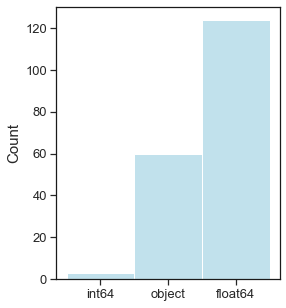

In [7]:
plt.figure(figsize=(4,5))
sns.histplot(df1.dtypes.astype('string'), color = 'lightblue')

# 3. Missing values
## 3.1. NaN over the whole dataset 'sample'

<AxesSubplot:>

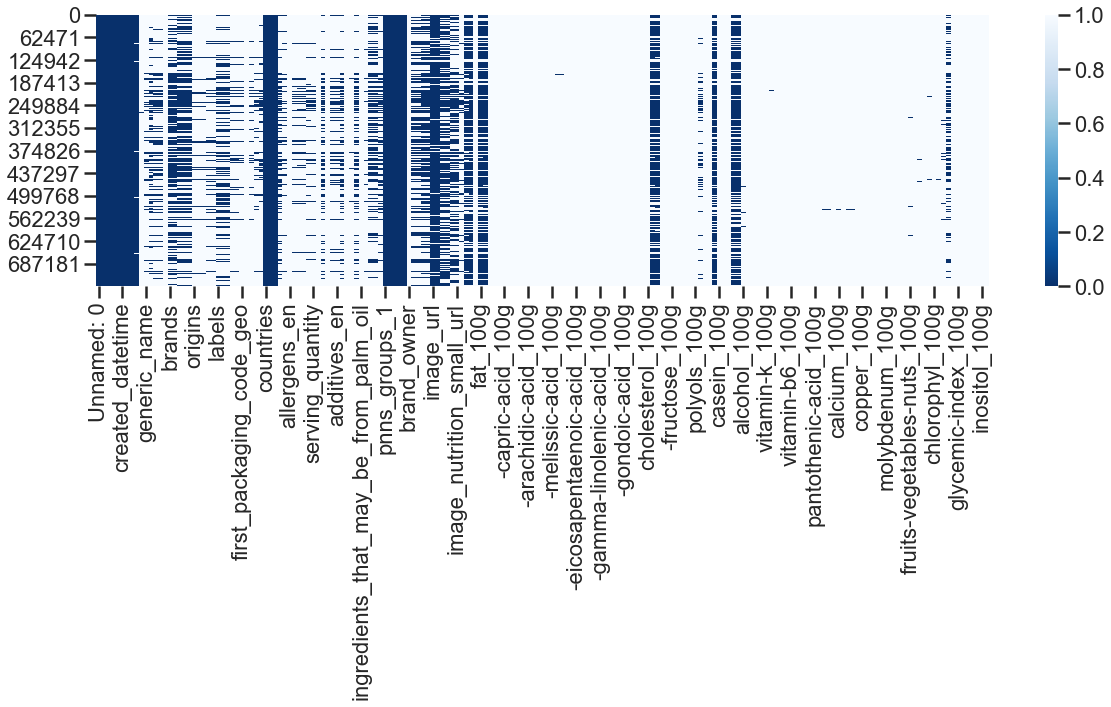

In [8]:
figure = plt.figure(figsize = (20,5))
sns.set_context('poster', font_scale = 1)
sns.heatmap(df1.isna(), cmap = "Blues_r")

## 3.2. NaN by columns

Text(0, 0.5, 'Count')

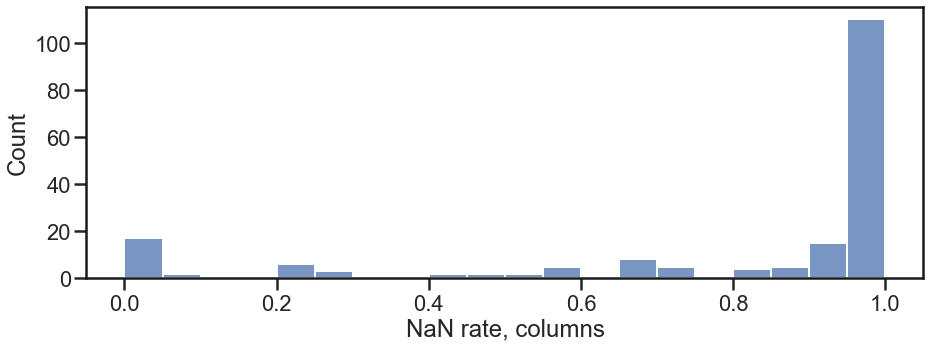

In [9]:
# NaN visualization
plt.figure(figsize=(15,5))
sns.set_context('poster', font_scale = 1)
sns.histplot(df1.isna().sum()/len(df1), bins=20)
plt.xlabel("NaN rate, columns")
plt.ylabel("Count")

# NaN over columns distribution and export
#df = (df1.isna().sum()/len(df1)).sort_values(ascending=False)
#df.to_excel('NaN_France.xlsx')
#df

### **=> df2 : Drop uninteresting columns** 

In [10]:
df2 = df1.drop(df1.columns[(df1.isna().sum()/len(df1)) > 0.911],axis=1)
df2 = df2.drop(df2.columns[  ((df2.isna().sum()/len(df2)) < 0.910 )   &     ((df2.isna().sum()/len(df2)) > 0.901)   ],   axis=1)
df2 = df2.drop(df2.columns[  ((df2.isna().sum()/len(df2)) < 0.90 )   &     ((df2.isna().sum()/len(df2)) > 0.86)   ],   axis=1)
df2 = df2.drop(df2.columns[  ((df2.isna().sum()/len(df2)) < 0.84 )   &     ((df2.isna().sum()/len(df2)) > 0.82)   ],   axis=1)
df2 = df2.drop(df2.columns[  ((df2.isna().sum()/len(df2)) < 0.51 )   &     ((df2.isna().sum()/len(df2)) > 0.254)   ],   axis=1)
df2 = df2.drop(df2.columns[  ((df2.isna().sum()/len(df2)) < 0.10)   &     ((df2.isna().sum()/len(df2)) > 0.08)   ],   axis=1)
df2 = df2.drop(df2.columns[  ((df2.isna().sum()/len(df2)) < 0.000018)   ],   axis=1)
df2 = df2.drop(columns = [  'ingredients_text', 'ingredients_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil_n', 'nutrition-score-fr_100g', 'sodium_100g' ])

df2.to_csv('df2.csv')

In [11]:
df2.shape


(749648, 32)

<AxesSubplot:>

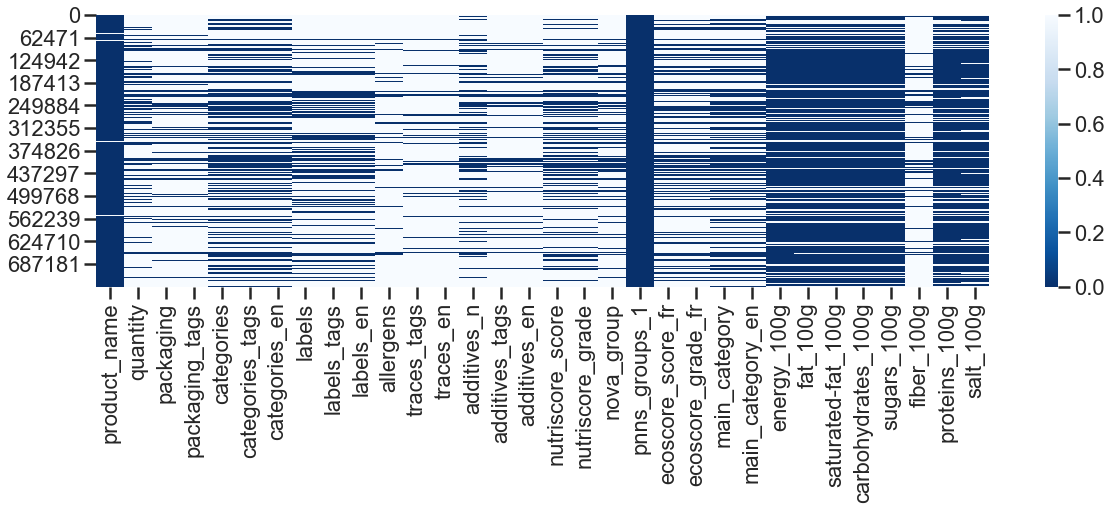

In [12]:
figure = plt.figure(figsize = (20,5))
sns.set_context('poster', font_scale = 1)
sns.heatmap(df2.isna(), cmap = "Blues_r")

# 4. Finding categorical variables

In [13]:
df2.nunique().sort_values() # the number of unique entries for cat var << len(DF)

nova_group                 4
nutriscore_grade           5
ecoscore_grade_fr          5
pnns_groups_1             12
additives_n               29
nutriscore_score          54
ecoscore_score_fr        148
fiber_100g              1458
allergens               2786
energy_100g             4503
saturated-fat_100g      4724
proteins_100g           5287
traces_tags             5388
traces_en               5388
fat_100g                6174
sugars_100g             6498
salt_100g               6718
carbohydrates_100g      8087
main_category_en       15606
main_category          15606
quantity               20029
packaging_tags         21501
packaging              26989
additives_en           28315
additives_tags         28315
labels_en              30847
labels_tags            30847
labels                 35829
categories_en          37551
categories_tags        37551
categories             42908
product_name          492266
dtype: int64

In [14]:
cat_var = ['nova_group', 'nutriscore_grade', 'ecoscore_grade_fr', 'pnns_groups_1']

# 5. Remove obvious outliers
## **=> df3**  

* Replace outliers by NaN
* Filter data with z-score < 5
* z-score = 5 is high, hence the data are not 'too mcuh' altered

In [15]:
df2.size

23988736

In [16]:
# cut off obvious outliers (are remplaced by NaN)
df3 = df2.copy()

for col in df2.select_dtypes(float):
    z_score =  (np.abs(df2[col].mean()-df2[col]) / df2[col].std()) < 3.5
    df3[col] = df2[col][z_score]
# df3.drop('ingredients_from_palm_oil_n', axis = 1, inplace=True)
print(df3.quantile(0.99) == df2.quantile(0.99))
print('\n','Outliers removed = ', df3.isna().sum().sum() - df2.isna().sum().sum())

additives_n           False
nutriscore_score       True
nova_group             True
ecoscore_score_fr      True
energy_100g            True
fat_100g               True
saturated-fat_100g    False
carbohydrates_100g    False
sugars_100g            True
fiber_100g            False
proteins_100g          True
salt_100g             False
Name: 0.99, dtype: bool

 Outliers removed =  9129


# 6. Creation of  new variables : 'addives_allergens_n' and 'allergens_n'

* My idea is that the app will directly warn the users if there are allergens (and how many) within the product
* There is an allergens columns in the data, but this does not list potential allergens in additives (there is a columns listing additives)
* From scientific literature, I selected a list of additives that frequently cause allergic reactions
* In additives columns, we count how many substances are potentially also allergens

In [17]:
df3['addives_allergens_n'] = df3['additives_tags'].str.count("e412|e321|e310|e412|e1520|e621|e160|e951|e211|e212|e213|e214|e215|e218|e219|e251|e252|e249|e250|e223|e160b|e120|e164|e102",  flags=re.IGNORECASE)
df3['allergens_n'] = df3['allergens'].str.count(":",  flags=re.IGNORECASE)

In [18]:
idea = ['additives_n', 'allergens_n', 'addives_allergens_n' ]

for col in idea:
    df3[col] =df3[col].fillna(0)
    
df3['allergens_TOTAL'] = df3['allergens_n'] + df3['addives_allergens_n']

C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


count    749648.000000
mean          0.262674
std           0.855393
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          33.000000
Name: allergens_TOTAL, dtype: float64

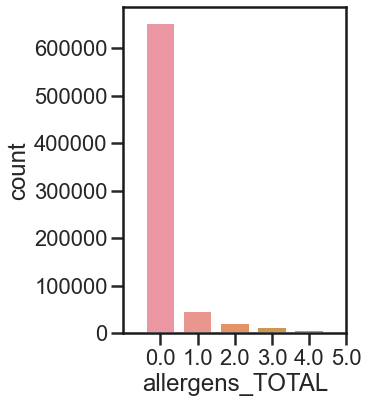

In [19]:
plt.figure(figsize=(4,6))
sns.countplot(df3['allergens_TOTAL'] )
plt.xlim(-1,5)
df3['allergens_TOTAL'].describe()

# 7. Cleaned data summary

Index(['product_name', 'quantity', 'packaging', 'packaging_tags', 'categories',
       'categories_tags', 'categories_en', 'labels', 'labels_tags',
       'labels_en', 'allergens', 'traces_tags', 'traces_en', 'additives_n',
       'additives_tags', 'additives_en', 'nutriscore_score',
       'nutriscore_grade', 'nova_group', 'pnns_groups_1', 'ecoscore_score_fr',
       'ecoscore_grade_fr', 'main_category', 'main_category_en', 'energy_100g',
       'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g',
       'fiber_100g', 'proteins_100g', 'salt_100g', 'addives_allergens_n',
       'allergens_n', 'allergens_TOTAL'],
      dtype='object')
(749648, 35)
0.503784366605584


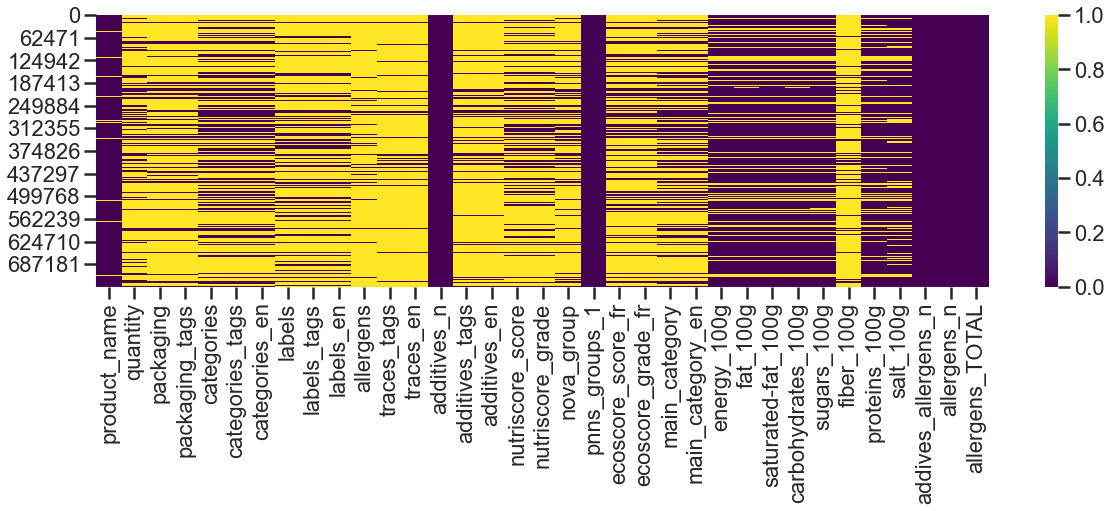

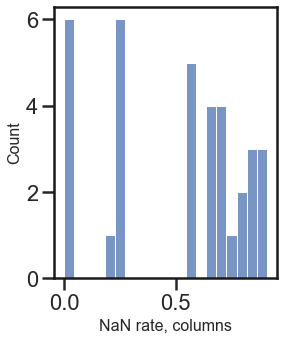

In [20]:
# Remaining columns
print(df3.columns)

# Data shape col x row
print(df3.shape)

# NaN rate over the whole dataset
print(df3.isna().sum().sum()/df3.size)

# NaN visualisation
figure = plt.figure(figsize = (20,5))
sns.set_context('poster', font_scale = 1)
sns.heatmap(df3.isna(), cmap = "viridis")

# NaN over columns distribution
plt.figure(figsize=(4,5))
sns.set_context('poster', font_scale = 1)
sns.histplot(df3.isna().sum()/len(df3), bins=20)
plt.xlabel("NaN rate, columns", fontsize=16)
plt.ylabel("Count", fontsize=16)

df3.to_csv('df3.csv')

# 8. Imputation for targets

## 8.1. Imputation of nova_group with KNN

* Train/test data splitting and finding optimal k neighbors
* Take care that features are more filled than target !
* **NaN target = 75% vs. NaN features < 26%**

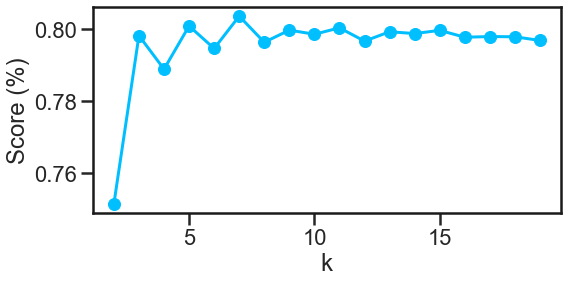

In [21]:
# Select target and features 
df = df3[['nova_group', 'sugars_100g', 'proteins_100g', 'fat_100g', 'salt_100g']].dropna(axis=0)

target = df['nova_group']
target = target.to_numpy(dtype=(int))

features = df[['sugars_100g', 'proteins_100g', 'fat_100g', 'salt_100g']]
features = features.to_numpy(dtype=(float))

# Train/test data splitting
X_train, X_test, y_train, y_test = train_test_split(features, target, train_size=0.9)

# Finding optimal k
score = []
for k in range(2,20):
    knn = neighbors.KNeighborsClassifier(k)
    score.append(knn.fit(X_train, y_train).score(X_test, y_test))
    
plt.figure(figsize = (8.4, 3.8))
plt.plot(range(2,20), score, 'o-', c='deepskyblue')
plt.xlabel('k')
plt.ylabel('Score (%)')
plt.show()

* Apply model and visualization of some prediction

In [24]:
# On récupère le classifieur le plus performant
model = neighbors.KNeighborsClassifier(n_neighbors=10)
model.fit(X_train, y_train)

# On récupère les prédictions sur les données test
predicted = model.predict(X_test)

# On selectionne un echantillon de n = 20 dans y_test
select = np.random.randint(len(y_test), size=20)

for i in select:
    print(f'{y_test[i] :-<20} {model.predict([X_test[i]])} ')

4------------------- [4] 
4------------------- [4] 
4------------------- [4] 
2------------------- [2] 
4------------------- [4] 
4------------------- [4] 
4------------------- [4] 
4------------------- [4] 
4------------------- [4] 
1------------------- [1] 
4------------------- [4] 
4------------------- [4] 
3------------------- [4] 
4------------------- [4] 
4------------------- [4] 
1------------------- [1] 
3------------------- [3] 
1------------------- [1] 
4------------------- [3] 
4------------------- [4] 


* Data imputation 
## **=> df4**

<ipython-input-25-310c364eaea9>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['nova_group'] = df4['nova_group'].fillna(pred[0])


0


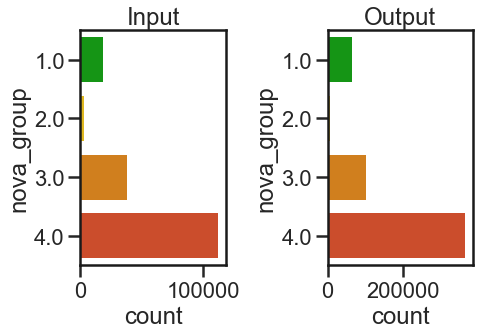

In [25]:
# Dropna for the features (NaN rate < 26%)
df4 = df3.dropna(subset=['sugars_100g', 'proteins_100g', 'fat_100g', 'salt_100g'], axis = 0)

# Mask nova_group isna
mask = df4[df4['nova_group'].isna()]

# Predict target values
pred =  pd.DataFrame( model.predict(mask[['sugars_100g', 'proteins_100g', 'fat_100g', 'salt_100g']]) )

# Target fillna
pred.index = mask.index
df4['nova_group'] = df4['nova_group'].fillna(pred[0])
print(df4['nova_group'].isna().sum())

# Output visualization 
Nova_palette = [ '#00AA00', '#FECB02', '#EE8100', '#E63E11' ]

fig = plt.figure(figsize = (7, 5))

plt.subplot(1,2,1)
sns.set_context('poster', font_scale = 1)
sns.countplot(y = df3['nova_group'], data = df3, palette = Nova_palette)
plt.title('Input')

plt.subplot(1,2,2)
sns.set_context('poster', font_scale = 1)
sns.countplot(y = df4['nova_group'], data = df4, palette = Nova_palette)
plt.title('Output')

fig.tight_layout(pad=0.8)
plt.show()

df4.to_csv('df4.csv')

## 8.2. Imputation of nutriscore_grade with KNN

* Train/test data splitting and finding optimal k neighbors
* Take care that features are more filled than target !
* **NaN target = 66% vs. NaN features < 26%**

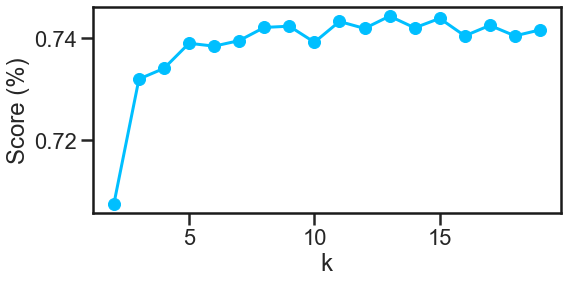

In [26]:
# Select target and features 
df = df4[['nutriscore_grade',  'sugars_100g',  'saturated-fat_100g', 'salt_100g']].dropna(axis=0)

target = df['nutriscore_grade']
target = target.to_numpy(dtype=(str))

features = df[[ 'sugars_100g', 'saturated-fat_100g', 'salt_100g']]
features = features.to_numpy(dtype=(float))

# Train/test data splitting
X_train, X_test, y_train, y_test = train_test_split(features, target, train_size=0.9)

# Finding optimal k
score = []
for k in range(2,20):
    knn = neighbors.KNeighborsClassifier(k)
    score.append(knn.fit(X_train, y_train).score(X_test, y_test))

plt.figure(figsize = (8.4, 3.8))
plt.plot(range(2,20), score, 'o-', c='deepskyblue')
plt.xlabel('k')
plt.ylabel('Score (%)')
plt.show()

In [27]:
# On récupère le classifieur le plus performant
model = neighbors.KNeighborsClassifier(n_neighbors=10)
model.fit(X_train, y_train)

# On récupère les prédictions sur les données test
predicted = model.predict(X_test)

# On selectionne un echantillon de n = 100 dans y_test
select = np.random.randint(len(y_test), size=20)

for i in select:
    print(f'{y_test[i] :-<20} {model.predict([X_test[i]])} ')

d------------------- ['d'] 
e------------------- ['e'] 
a------------------- ['a'] 
b------------------- ['b'] 
d------------------- ['d'] 
d------------------- ['d'] 
d------------------- ['d'] 
d------------------- ['d'] 
d------------------- ['d'] 
c------------------- ['c'] 
d------------------- ['d'] 
c------------------- ['c'] 
a------------------- ['c'] 
c------------------- ['c'] 
d------------------- ['c'] 
e------------------- ['d'] 
c------------------- ['d'] 
e------------------- ['e'] 
e------------------- ['e'] 
c------------------- ['a'] 


## => df5

<ipython-input-28-6a837ed46ee4>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['nutriscore_grade'] = df5['nutriscore_grade'].fillna(pred[0])


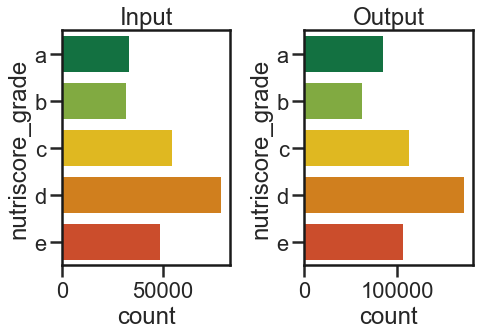

In [28]:
# Dropna for the features (NaN rate < 26%)
df5 = df4.dropna(subset=['sugars_100g', 'saturated-fat_100g', 'salt_100g'], axis = 0)

# Mask nutriscore_grade isna
mask = df5[df5['nutriscore_grade'].isna()]

# Predict target values
pred =  pd.DataFrame( model.predict(mask[['sugars_100g', 'saturated-fat_100g', 'salt_100g']]) )
pred.index = mask.index

# Target fillna
df5['nutriscore_grade'] = df5['nutriscore_grade'].fillna(pred[0])

# Output visualization
abcde = ['a', 'b', 'c', 'd', 'e']
Nutri_palette = ['#038141' ,  '#85BB2F','#FECB02', '#EE8100', '#E63E11' ]

fig = plt.figure(figsize = (7, 5))
sns.set_palette("viridis_r" , n_colors = len(abcde))

plt.subplot(1,2,1)
sns.set_context('poster', font_scale = 1)
sns.countplot(y = df4['nutriscore_grade'], data = df4, order = abcde, palette = Nutri_palette)
plt.title('Input')

plt.subplot(1,2,2)
sns.set_context('poster', font_scale = 1)
sns.countplot(y = df5['nutriscore_grade'], data = df5, order = abcde, palette = Nutri_palette)
plt.title('Output')

fig.tight_layout(pad=0.8)
plt.show()

df5.to_csv('df5.csv')

## 8.3. Creation and imputation of new_ecoscore with KNN

* ecoscore is poorly correlated to features (cf. bivariate analysis)
* The reason is that ecoscore si computed using life cycle analysis, which features are not listed in these data

* NaN target = 65% vs. NaN features < 26%

* To increase consistency, we aggregate the data into new variable 'new_ecoscore' : <br> <br>
* **ecoscore < 50 => new_ecoscore = False (0)** 
* **ecoscore >= 50 => new_ecoscore =True (1)**<br> <br>

In [29]:
df5['new_ecoscore'] = (df5['ecoscore_score_fr'].dropna() >= 50)

<ipython-input-29-ae9913f3be39>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['new_ecoscore'] = (df5['ecoscore_score_fr'].dropna() >= 50)


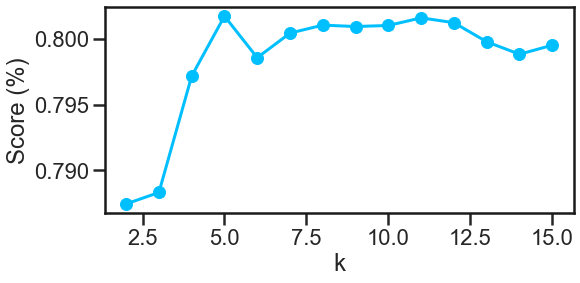

In [30]:
df = df5[['new_ecoscore',  'proteins_100g', 'carbohydrates_100g', 'salt_100g' ]].dropna(axis=0)

target = df['new_ecoscore']
target = target.to_numpy(dtype=(int))

features = df[[ 'proteins_100g', 'carbohydrates_100g', 'salt_100g']]
features = features.to_numpy(dtype=(float))

X_train, X_test, y_train, y_test = train_test_split(features, target, train_size=0.8)
model = neighbors.KNeighborsClassifier(n_neighbors=5)

score = []

xx = np.linspace(2,15, 14).astype('int')
for k in xx:
    knn = neighbors.KNeighborsClassifier(k)
    score.append(knn.fit(X_train, y_train).score(X_test, y_test))

plt.figure(figsize = (8.4, 3.8))
plt.plot(xx, score, 'o-', c='deepskyblue')
plt.xlabel('k')
plt.ylabel('Score (%)')
plt.show()

In [31]:
# On récupère le classifieur le plus performant
model = neighbors.KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

# On récupère les prédictions sur les données test
predicted = model.predict(X_test)

# On selectionne un echantillon de n = 100 dans y_test
select = np.random.randint(len(y_test), size=20)

for i in select:
    print(f'{y_test[i] :-<20} {model.predict([X_test[i]])} ')

0------------------- [1] 
1------------------- [1] 
0------------------- [1] 
1------------------- [1] 
1------------------- [1] 
0------------------- [0] 
1------------------- [0] 
0------------------- [0] 
1------------------- [0] 
0------------------- [1] 
1------------------- [1] 
1------------------- [1] 
0------------------- [0] 
0------------------- [0] 
0------------------- [0] 
1------------------- [1] 
1------------------- [1] 
1------------------- [1] 
1------------------- [1] 
0------------------- [0] 


## => df6

<ipython-input-32-b49f128ad114>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6['new_ecoscore'] = df6['new_ecoscore'].fillna(pred[0])
<ipython-input-32-b49f128ad114>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6['new_ecoscore'] = df6['new_ecoscore'].astype(float)
<ipython-input-32-b49f128ad114>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

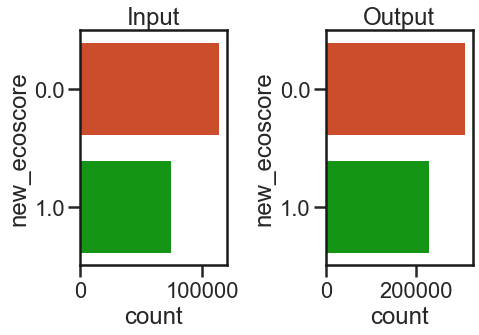

In [32]:
# Dropna for the features (NaN rate < 26%)
df6 = df5.dropna(subset=['proteins_100g', 'carbohydrates_100g', 'salt_100g'], axis = 0)


# Mask nutriscore_grade isna
mask = df6[df6['new_ecoscore'].isna()]

# Predict target values
pred =  pd.DataFrame( model.predict(mask[['proteins_100g', 'carbohydrates_100g', 'salt_100g']]) )
pred.index = mask.index

# Target fillna
df6['new_ecoscore'] = df6['new_ecoscore'].fillna(pred[0])

# Put True = 1 and False  = 0
#f = lambda x: 1 if ((x == 'True') or (x == '1.0')) else 0
#df6['new_ecoscore'] = df6['new_ecoscore'].apply(f)
#df6['new_ecoscore'].unique()

# Output visualization
df6['new_ecoscore'] = df6['new_ecoscore'].astype(float)
df5['new_ecoscore'] = df5['new_ecoscore'].astype(float)

fig = plt.figure(figsize = (7, 5))
sns.set_palette("viridis" , n_colors =2)

plt.subplot(1,2,1)
sns.set_context('poster', font_scale = 1)
sns.countplot(y = df5['new_ecoscore'], data = df5,  palette = [Nova_palette[-1], Nova_palette[0]])
plt.title('Input')

plt.subplot(1,2,2)
sns.set_context('poster', font_scale = 1)
sns.countplot(y = df6['new_ecoscore'], data = df6,  palette = [Nova_palette[-1], Nova_palette[0]])
plt.title('Output')

fig.tight_layout(pad=0.8)
plt.show()

df6.to_csv('df6.csv')

# 9. Summary

<AxesSubplot:>

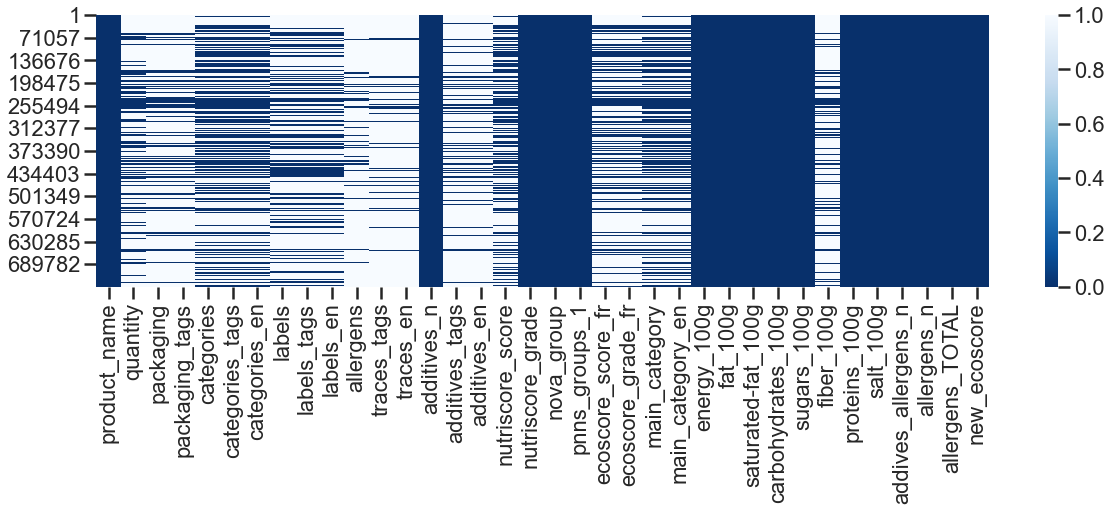

In [33]:
df = df6.copy()

figure = plt.figure(figsize = (20,5))
sns.set_context('poster', font_scale = 1)
sns.heatmap(df.isna(), cmap = "Blues_r")

In [34]:
# Data shape col x row
print(df.shape)

# NaN rate over the whole dataset
print(df.isna().sum().sum()/df.size)

df.head()

(541579, 36)
0.3820804023461438


,product_name,quantity,packaging,packaging_tags,categories,categories_tags,categories_en,labels,labels_tags,labels_en,...,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,addives_allergens_n,allergens_n,allergens_TOTAL,new_ecoscore
1,Vitória crackers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.08,70.1,15.0,NaN,7.8,1.40,0.0,0.0,0.0,1.0
3,moutarde au moût de raisin,100g,NaN,NaN,"Epicerie, Condiments, Sauces, Moutardes","en:groceries,en:condiments,en:sauces,en:mustards","Groceries,Condiments,Sauces,Mustards",Delois france,fr:delois-france,fr:delois-france,...,2.20,29.0,22.0,0.0,5.1,4.60,0.0,1.0,1.0,1.0
5,Sauce Sweety chili 0%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,4.8,0.4,NaN,0.2,2.04,0.0,0.0,0.0,1.0
6,Mini coco,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.00,10.0,3.0,NaN,2.0,1.15,0.0,0.0,0.0,0.0
12,Pur jus de pomme,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,15.5,15.5,NaN,0.2,0.00,0.0,0.0,0.0,0.0
